# <center>Projet Deep Learning - Exercice de classification</center>

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import glob
from keras.callbacks import ModelCheckpoint

from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import InputLayer
from matplotlib import pyplot as plt
from random import randint
from sklearn.utils import shuffle
import matplotlib.image as mpimg
%matplotlib inline

On va afficher 5 images random présentes dans le fichier.

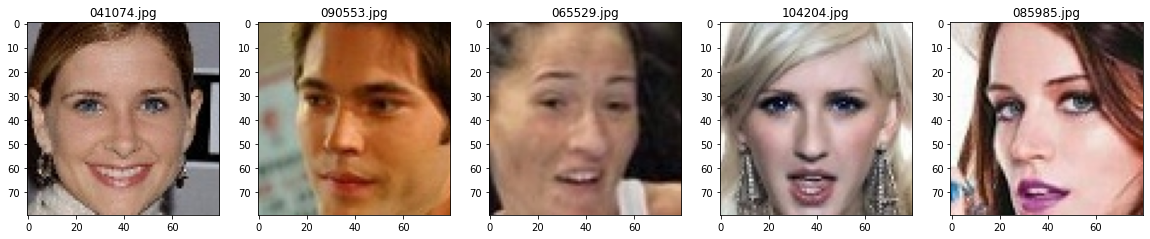

In [2]:
plt.figure(figsize=(20,20))
img_folder = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_train')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

##### Création des données d'image et des étiquettes à partir des images du dossier

- Le dossier source est le paramètre d'entrée contenant les images des différentes classes.

- Lire le fichier image du dossier et le convertir au bon format de couleur.

- Redimensionnez l'image en fonction de la dimension d'entrée requise pour le modèle.

- Convertir l'image en un tableau Numpy avec float32 comme type de données.

- Normaliser le tableau d'images pour avoir des valeurs réduites entre 0 et 1 de 0 à 255 pour une distribution de données similaire, ce qui permet une convergence plus rapide.

In [3]:
list_image = os.listdir(img_folder)
len(list_image)

119294

In [4]:
file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
# utilisez readline() pour lire la première ligne
line = file.readline()
i = 0
while line:
    i = i + 1
    # utilisez readline() pour lire la ligne suivante
    line = file.readline()
file.close()
print(i)

119294


In [5]:
# Modification de la dimension des images 
img_size = 80

def create_dataset_train(img_folder, nb):
   
    img_data_array=[]
    class_name=[]
    label_file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
    label_file = label_file.readlines()
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
        class_name.append(label_file[i].replace("\n",""))
    file.close()
    return shuffle(img_data_array, class_name, random_state = 10)
    
img_data, class_name = create_dataset_train(img_folder, 10000)

In [6]:
img = np.array(img_data)
img.shape

(10000, 80, 80, 3)

In [7]:
type(img_data)

list

In [8]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'0': 0, '1': 1}

In [9]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

#### Création du réseau convolutif de base

In [10]:
batch_size = 4
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(80, 80, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activity_regularizer=tf.keras.regularizers.L2(0.01), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(x=np.array(img_data, np.float32), 
                    y=np.array(list(map(int,target_val)),np.float32), 
                    epochs=100,
                    batch_size=32,
                    callbacks=[callback],
                    validation_split = 0.4, 
                    verbose=2, 
                    shuffle=True)

Epoch 1/100
188/188 - 17s - loss: 0.5726 - accuracy: 0.7460 - val_loss: 0.6400 - val_accuracy: 0.7365 - 17s/epoch - 88ms/step
Epoch 2/100
188/188 - 16s - loss: 0.5349 - accuracy: 0.7468 - val_loss: 0.5332 - val_accuracy: 0.7365 - 16s/epoch - 83ms/step
Epoch 3/100
188/188 - 15s - loss: 0.5102 - accuracy: 0.7468 - val_loss: 0.5330 - val_accuracy: 0.7365 - 15s/epoch - 81ms/step
Epoch 4/100
188/188 - 15s - loss: 0.4932 - accuracy: 0.7470 - val_loss: 0.5010 - val_accuracy: 0.7365 - 15s/epoch - 82ms/step
Epoch 5/100
188/188 - 15s - loss: 0.4755 - accuracy: 0.7477 - val_loss: 0.4838 - val_accuracy: 0.7375 - 15s/epoch - 82ms/step
Epoch 6/100
188/188 - 15s - loss: 0.4649 - accuracy: 0.7527 - val_loss: 0.5129 - val_accuracy: 0.7380 - 15s/epoch - 82ms/step
Epoch 7/100
188/188 - 16s - loss: 0.4509 - accuracy: 0.7700 - val_loss: 0.4836 - val_accuracy: 0.7362 - 16s/epoch - 83ms/step
Epoch 8/100
188/188 - 16s - loss: 0.4336 - accuracy: 0.7802 - val_loss: 0.4504 - val_accuracy: 0.7695 - 16s/epoch - 83

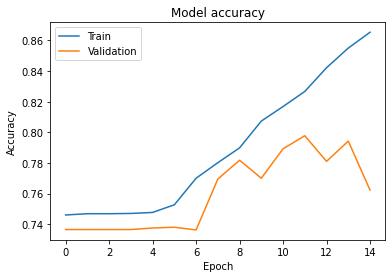

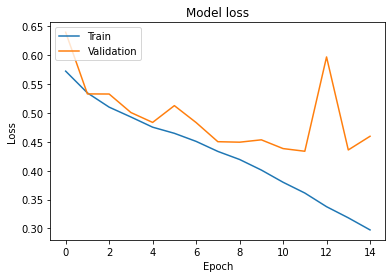

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
img_folder_val = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_val')
def create_dataset_val(img_folder_val, nb):
   
    img_data_array=[]
    imageList = os.listdir(img_folder_val)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder_val, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
    file.close()
    return img_data_array
    #return pd.DataFrame({'Image num': img_data_array,'label': class_name})
# extract the image array and class name
#df = create_dataset(img_folder, 100)
test_images = create_dataset_val(img_folder_val, 2000)

In [14]:
predictions = model.predict(np.array(test_images))
predictions = np.array(predictions)

In [15]:
classes = np.argmax(predictions, axis = 1)
print(classes[:100])

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]


In [16]:
fichier = open("predictions_TCHIASSO_LOMBARD.txt", "w")
list_label = classes.tolist()
for i in list_label:
    fichier.write(str(i) + "\n")
fichier.close()